## CISC 6930: Data Mining 
Assignmnet 2
<br>
Angela Krontiris
<br>
Program used: Python
<br>
October 12, 2018

#### Question 1: Implement KNN classifier

In [89]:
import pandas as pd
import numpy as np
%matplotlib inline

test  = pd.read_csv('spam_test.csv')
train = pd.read_csv('spam_train.csv')

features = [ 'f'+str(i) for i in range(1,58) ]
K = [1,5,11,21,41,61,81,101,201,401]

test_mat  = test[features].values
train_mat = train[features].values

#### 1a) Report test accuracies when k= 1,5,11,21,41,61,81,101,201,401  without normalizing the features.

1      0.751847
5      0.754889
11     0.764885
21     0.746632
41     0.752282
61     0.737505
81     0.726641
101    0.728814
201    0.731421
401    0.719687
dtype: float64

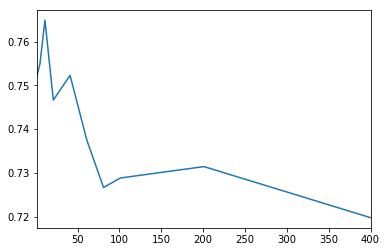

In [90]:
pred = {}
for i in range(test.shape[0]):
    # We only need the sum of squares in order to rank by distance, 
    # since sqrt() is a monotonic transformation
    # 
    # "test_mat[i,:] - train_mat" does a *broadcast* operation 
    # (https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)
    # This is significantly faster than iterating over the taining set,
    # because Numpy arithmetic in C is vectorized and is extremely fast,
    # whereas looping over the rows of the matrix in Python is much slower
    #
    # sum_sq ends up being a np.array() of the same size as the training set
    #
    sum_sq = np.sum(np.square(test_mat[i,:] - train_mat), axis=1)
    
    # This is how we match the distance with the training labels.  At this
    # point, we know they're in the same order, because train_mat, train, and sum_sq
    # are all in the same order
    #
    df = pd.DataFrame({'sum_sq':sum_sq,'class':train['class']})
    
    # Sort the DataFrame by the distance, then take the 'class' column
    sorted_class = df.sort_values('sum_sq')['class']
    
    # Predict by determining whether mean of training class is > 5
    pred[i] = [sorted_class[:k].mean() > 0.5 for k in K]
    
# Now pred{} is a map from the row index of the test set to the predictions. 
# We can match it with the labels from the test set by doing a 
# pd.concat(..., axis=1), which will match on the Index.  
# "pd.DataFrame(pred, index=K)" gives us a DataFrame with 1 row per K 
# and 1 column per member of the test set.  We cast it to int (since it's a 
# boolean after doing > 0.5), and then take the transpose (".T") so that now 
# it's a matrix with 1 row per member of the test set.
test_with_pred = pd.concat([test, pd.DataFrame(pred, index=K).astype(int).T], axis=1)

# Accuracy is the % of the time the predicted and actual labels match
accuracy = pd.Series({k:(test_with_pred.Label == test_with_pred.loc[:,k]).mean() for k in K})
accuracy.plot()
accuracy

#### 1b) Report test accuracies when k= 1,5,11,21,41,61,81,101,201,401 with z-sore normalization applied to the features.

In [91]:
# Take the mean of each column (axis=0)
mu = train_mat.mean(axis=0)
sigma = train_mat.std(axis=0)
#Z score normalization for Test set using Training set
#df_normalized[[col]] = (dataFrame[[col]] - colMean)/colStd

z_score_train =  (train_mat - mu)/sigma
print(z_score_train)

[[ -3.49034620e-01   1.78848168e-01   7.15694977e-01 ...,  -5.61520521e-02
    6.04041908e-02  -3.07579604e-02]
 [  4.07692741e-01  -2.35882426e-02   4.36187660e-01 ...,  -2.33287294e-02
    3.39715889e-01   1.22718414e+00]
 [ -1.32826803e-01  -1.81038784e-01   8.55448636e-01 ...,   9.04410643e-02
    3.02110819e+00   3.29188643e+00]
 ..., 
 [ -3.49034620e-01  -1.81038784e-01  -5.62052756e-01 ...,  -9.05464470e-02
   -2.60804262e-01  -2.03515342e-01]
 [ -3.49034620e-01  -1.81038784e-01   6.35835744e-01 ...,  -1.20976906e-01
   -3.44597772e-01  -4.48394736e-01]
 [ -3.49034620e-01  -1.09530812e-03   7.68211103e-02 ...,  -5.22364569e-02
    7.30752267e-01   7.97806567e-01]]


In [92]:
# z_score_train.std(axis=0)

In [93]:
z_score_test = (test_mat - mu)/sigma
#print(test_mat.std(axis=0))
#print(z_score_test.std(axis=0))

1      0.856150
5      0.870056
11     0.878748
21     0.884398
41     0.885267
61     0.882660
81     0.877445
101    0.875272
201    0.860061
401    0.839635
dtype: float64

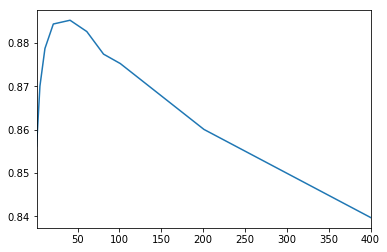

In [94]:
K = [1,5,11,21,41,61,81,101,201,401]

pred = {}
for i in range(test.shape[0]):
    # We only need the sum of squares in order to rank by distance, 
    # since sqrt() is a monotonic transformation
    # 
    # "test_mat[i,:] - train_mat" does a *broadcast* operation 
    # (https://docs.scipy.org/doc/numpy-1.15.0/user/basics.broadcasting.html)
    # This is significantly faster than iterating over the taining set,
    # because Numpy arithmetic in C is vectorized and is extremely fast,
    # whereas looping over the rows of the matrix in Python is much slower
    #
    # sum_sq ends up being a np.array() of the same size as the training set
    #
    sum_sq = np.sum(np.square(z_score_test[i,:] - z_score_train), axis=1)
    
    # This is how we match the distance with the training labels.  At this
    # point, we know they're in the same order, because train_mat, train, and sum_sq
    # are all in the same order
    #
    df = pd.DataFrame({'sum_sq':sum_sq,'class':train['class']})
    
    # Sort the DataFrame by the distance, then take the 'class' column
    sorted_class = df.sort_values('sum_sq')['class']
    
    # Predict by determining whether mean of training class is > 5
    pred[i] = [sorted_class[:k].mean() > 0.5 for k in K]
    
# Now pred{} is a map from the row index of the test set to the predictions. 
# We can match it with the labels from the test set by doing a 
# pd.concat(..., axis=1), which will match on the Index.  
# "pd.DataFrame(pred, index=K)" gives us a DataFrame with 1 row per K 
# and 1 column per member of the test set.  We cast it to int (since it's a 
# boolean after doing > 0.5), and then take the transpose (".T") so that now 
# it's a matrix with 1 row per member of the test set.
test_with_pred = pd.concat([test, pd.DataFrame(pred, index=K).astype(int).T], axis=1)

# Accuracy is the % of the time the predicted and actual labels match
accuracy = pd.Series({k:(test_with_pred.Label == test_with_pred.loc[:,k]).mean() for k in K})
accuracy.plot()
accuracy

#### 1c) Generate an output of KNN predicted labels for the first 50 instnaces (t1-t50)

In [97]:
answer = test_with_pred.copy()
answer[K] = answer[K].applymap(lambda x: "no" if x==0 else 'spam')
answer[[' ID']+K].head(50)

,ID,1,5,11,21,41,61,81,101,201,401
0,t1,spam,spam,spam,spam,spam,spam,spam,spam,no,no
1,t2,spam,spam,spam,spam,spam,spam,spam,spam,no,no
2,t3,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam
3,t4,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam
4,t5,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam
5,t6,spam,spam,no,spam,no,no,no,no,spam,spam
6,t7,spam,no,no,no,no,no,no,no,no,no
7,t8,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam
8,t9,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam
9,t10,spam,spam,spam,spam,spam,spam,spam,spam,spam,spam


In [96]:
# pd.DataFrame(pred, index=K)